In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
%matplotlib inline

### POI Propotion

In [3]:
Data = pd.read_csv("data/POI_Proportion.csv") # POI proportion of the whole China
Data.head()

,Category,City,Country
0,Accommodation Service,73.201100,26.798900
1,Auto Dealers,71.795640,28.204360
2,Auto Repair,69.330592,30.669408
3,Auto Service,72.646389,27.353611
4,Commercial House,85.668445,14.331555


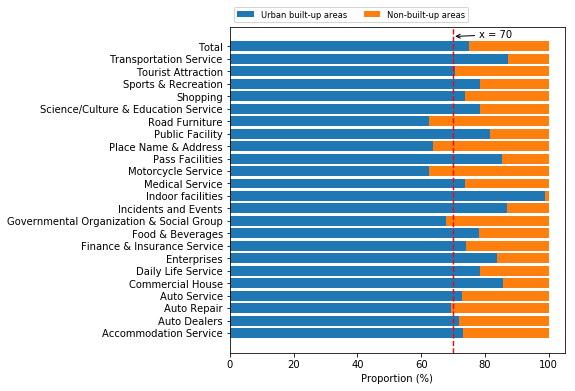

In [4]:
# get the x and y
x = Data['Category']
y1,y2 = Data.iloc[:,1], Data.iloc[:,2]

plt.figure(figsize=(6,6))
# draw to a barh plot
plt.barh(x,y1,label='Urban built-up areas',)
plt.barh(x,y2,label='Non-built-up areas', left = y1)

# vertical line
plt.axvline(x=70,c='r',ls='--',lw=1.4)
plt.annotate('x = 70', xy=(70,23.8), xytext=(70+8,23.7),
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

# Label the axes
plt.xlabel('Proportion (%)')

plt.legend(ncol=2, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
# plt.show()
plt.savefig('plot/POIP.png', dpi=600, bbox_inches = 'tight') # figsize=(6,4); 500*6-500*4 600*6-600*4


### BandWidth

In [5]:
Data = pd.read_csv("data/BW_POI_RN.csv") # BandWidth of POI and RN in KDE
Data.head()
# POI: poi kernel density, All: 500m; Sel: 750m
# Traffic: road density, 1500m

,BandWidth,POI_All,POI_Sel,RN
0,250,0.737699,0.740759,0.638109
1,500,0.748521,0.774189,0.692647
2,750,0.742058,0.779158,0.709934
3,1000,0.735284,0.774005,0.719009
4,1250,0.724496,0.763686,0.723000


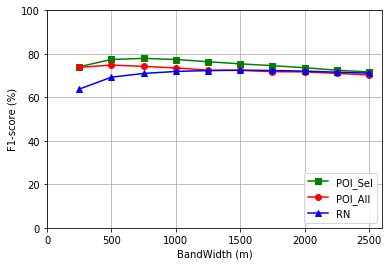

In [6]:
# get the x and y
x = Data['BandWidth']
y1,y2,y3 = Data.iloc[:,1]*100, Data.iloc[:,2]*100, Data.iloc[:,3]*100

# draw to a line plot
plt.plot(x,y2,'g-s')
a = x[Data.idxmax()[2]]
b = max(y2)
b2 = '%.2f' %(b)
plt.plot(x,y1,'r-o') #'b-o': color, linestyle, maker
a = x[Data.idxmax()[1]]
b = max(y1)
b2 = '%.2f' %(b)
plt.plot(x,y3,'b-^')
a = x[Data.idxmax()[3]]
b = max(y3)
b2 = '%.2f' %(b)

plt.xlim(0,2600)
plt.ylim(0,100)

# Label the axes
plt.xlabel('BandWidth (m)')
plt.ylabel('F1-score (%)')

#label the figure
plt.grid(True)
plt.legend(shadow=False,facecolor='w',loc=4)

# plt.show()
plt.savefig('plot/Band_Width_POI_RN.png', dpi=600, bbox_inches = 'tight')

### nodes

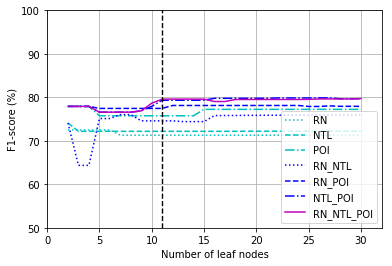

In [7]:
Data = pd.read_csv("data/DT_node.csv") # leaf node in DT model, node range: 2-30
# get the x and y
x = Data['nodes']
y1,y2,y3,y4,y5,y6,y7 = Data.iloc[:,1]*100, Data.iloc[:,2]*100, Data.iloc[:,3]*100, Data.iloc[:,4]*100, Data.iloc[:,5]*100, Data.iloc[:,6]*100, Data.iloc[:,7]*100

# draw to a line plot
plt.plot(x,y1,'c:') #'b-o': color, linestyle, maker
plt.plot(x,y2,'c--')
plt.plot(x,y3,'c-.')
plt.plot(x,y4,'b:')
plt.plot(x,y5,'b--')
plt.plot(x,y6,'b-.')
plt.plot(x,y7,'m')

# vertical line
plt.axvline(x=11,c='k',ls='--',lw=1.4)

# start they y axis at 0
plt.xlim(0,32)
plt.ylim(50,100)

# Label the axes
plt.xlabel('Number of leaf nodes')
plt.ylabel('F1-score (%)')

#label the figure
plt.grid(True)
plt.legend(shadow=False,facecolor='w',loc=4)

# plt.show()
plt.savefig('plot/DT_Node.png', dpi=600, bbox_inches = 'tight')

## precison, recall and f1-score

In [ ]:
fig,ax = plt.subplots(1,1)

def line_pre():
    para_DT = pd.read_csv('data/pred_DT/para_DT.csv')
#     para_DT = para_DT.round(2) # 所有数值为两位小数
    df = para_DT.iloc[:,[0,-3,-2,-1]] #### select precision recalll
#     df = para_DT_1.rename(columns={"Acc_Test": "Accuracy"}) ####
    tick_label = df['Name'].values
    col_name = df.columns[1:]
    x = np.arange(len(df)) # x of bar_plot.
    bar_width = 0.25
    
    for i in range(1,4):
        y = np.array(df.iloc[:,i].values)*100
        plt.bar(x,y,bar_width,label = col_name[i-1])
        for x0, y0 in zip(x, y):
            plt.text(x0, y0+0.01, '%.2f' % y0, ha='center', va='bottom', fontsize=6)
        x = x + bar_width
        
#     ax.set_xlim([0.0, 1.0]) # 
    ax.set_ylim([0, 100]) # 
    ax.set_ylabel('Value (%)')
    
    x1 = np.arange(len(df))
    plt.xticks(x1+bar_width,tick_label)
#     y1 = np.linspace(0,100,6)
#     y_label = ['%.2f' % i for i in y1]
#     plt.yticks(y1,y_label)
    ax.legend(shadow=False,facecolor='w',loc=4)
    plt.savefig('plot/pre_indicator_line.png', dpi=600, bbox_inches = 'tight')
line_pre()